# Introduction

<p align="justify">Welcome! In this case we'll be exploring how to use advanced analytic and machine learning techniques to predict high risk asthmatic patients. 

<br>
<br>
<details>
<summary>Some of the skills you'll explore are (Click to Expand):</summary>
<ul>
    <li>R Programming</li>
    <li>Data Cleaning</li>
    <li>Descriptive Analysis</li>
    <li>Data Visualization</li>
    <li>Leveraging Domain Knowledge</li>
    <li>Logistic Regression</li>
    <li>Machine Learning</li>
</details><br>

Don't worry if you're unsure what some of these terms are. They'll be explained throughout the case. Let's begin! 

<img src="https://i.stack.imgur.com/zlAi2.png" style="float: left; width: 35%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="http://cran.uvigo.es/Rlogo.svg" style="float: left; width: 25%; margin-left: 2%; margin-bottom: 0.5em;">
<img src="https://www.edvancer.in/wp-content/uploads/2015/10/f5bd5f87059fce20564f6e5eb562022e.png" style="float: left; width: 27%; margin-left: 5%; margin-bottom: 0.5em;">

## Case Scenario

Imagine you're a risk manager at the Blue Cross Blue Shield (a large health insurance organization). Over the last winter, reports show that the number of asthma cases increased. You're dismayed to discover that this has led to an increase in deaths and costs among these patients as well. It's critical that a targeted intervention is developed to lower mortality and cost among these patients but first you must identify high-risk patients. How can you do this?

Continue through the case to find out. 

### Extra: What is Asthma?

Asthma is a respiratory disease which causes constriction and inflammation of the airways in the lungs. The disease can often cause acute airway constrictions sometimes known as “asthma attacks.” Clinicians refer to this airway restriction as “bronchospasm” and it results in cough, wheezing, shortness of breath, and extreme situations such as death from respiratory arrest. Currently, approximately 10 people die from asthma attacks per day in the US.

<p align="center">
  <img width="400" height="200" src="https://asthma.net/wp-content/uploads/2015/04/ASTHMATIC-AIRWAYS.jpg">
</p>


Asthma requires a test of lung function known as spirometry to make a definitive diagnosis. Treatment often consists of inhaled medications that help combat airway constriction and inflammation. Patients that do not get timely and appropriate treatment can need avoidable emergency care and hospitalizations. These visits can add thousands of dollars per year in avoidable medical expenses to the US healthcare system. The medical costs among patients with uncontrolled asthma are 3-times higher than controlled patients.

## How To Run The Case (Do Not Skip)

Before we begin the case, we need to know how to use Jupyter Notebook and run the case. First, look for the the `Run` button. The location of the `Run` button is shown below and can be found in the tool bar above. 

<img src="https://i.imgur.com/jr4dpLW.png">


The cell below is a code cell. You will be running numerous code cells like the one below throughout the case. Select the cell and select the run button above. 

In [3]:
# This is an example of a code cell
cat('Congratulations! \n')
cat('You\'ve run your first code cell.\n')


Congratulations! 
You've run your first code cell.


<img width = 50 height = 50 style="float: left; margin-right: 10px;" src="https://upload.wikimedia.org/wikipedia/commons/b/b9/Stop_sign_dark_red.svg">Stop! If you have not learned to run a code cell, restart this section. You will not be able to go through the case at all if you are unable to run code cells. Otherwise, it's time to meet our data!

## Meeting Our Data

We'll be using the Medical Expenditure Panel Survey (MEPS) to predict Asthma Expenditure. Identifying an appropriate data source is critical in Analytics. Without the right dataset, your analysis is doomed from the start. 

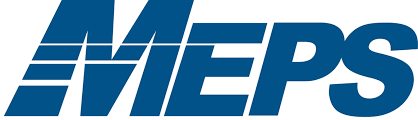

### What is MEPS?

MEPS is a national survey that seeks to capture as much data as possible about healthcare costs and use within the United States. Below is a detailed definition. 

> The Medical Expenditure Panel Survey (MEPS) is a set of large-scale surveys of families and individuals, their medical providers, and employers across the United States. MEPS is the most complete source of data on the cost and use of health care and health insurance coverage. - [meps.ahrq.gov](https://meps.ahrq.gov/mepsweb/)

MEPS contains over 2000 variables, detailed expenditure data, and comprehensive medical information. In other words, it has all the ingredients to build our prediction model!


### Necessary Data Files

<p style="text-align: center;">h128.csv</p>

***
Contains data on medical conditions for 2009 MEPS samples

<p style="text-align: center;">h129.csv</p>

***
Contains main information for 2009 MEPS samples, information includes survey data, demographics, and expenditure data

Both data files will already be downloaded as part of our case. They can also be accessed directly from the MEPS website. 'h128' can be accessed [here](https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-128). 'h129' can be accessed [here](https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-129)

# Setup (Do Not Skip)

Run the code below to set up specific settings for our case. Do not skip this step!

In [4]:
# Increase max number of columns displayed in output tables
options(repr.matrix.max.cols = 2000)
cat('Setup complete!')
# Calling external libraries for additional functionality
suppressMessages(library(tidyverse))
suppressMessages(library(plyr))
suppressMessages(library(caret))
suppressMessages(library(e1071))
suppressMessages(library(pROC))

Setup complete!

# Cleaning Our Data

The first step in any analytic project is to clean our data. This is a critical step that commonly overlooked within data science projects. However, without properly processed data, it won't matter how sophisticated our analysis is. A common saying in data science is "Junk in, Junk out". 

## Reading Our data

We'll read in our data so we can clean and use it. 

In [5]:
# Note: Unicode Transformation Format – 8 (UTF-8) is a standard to encode characters in different languages
cat('Data loading, please wait\n')
condition <- read.csv(file="data/h128.csv",  encoding="UTF-8", header=TRUE, sep=",")
consolidation <- read.csv(file="data/h129.csv",  encoding="UTF-8", header=TRUE, sep=",")
cat('Data loaded!')

Data loading, please wait
Data loaded!

## Selecting Asthmatic Patients

The MEPS data contains individuals with numerous conditions. We need to select only those individuals with asthma. We will identify these patients based on their International Classification of Disease, Ninth Revision (ICD-9) code. A ICD-9 code is simply a code that represents a diagnoses.

First, let's see how many total observations there are to establish a baseline.

In [6]:
# Display the total number of data instances
cat("The number of entire data instances are:", length(condition$DUID),"\n")

The number of entire data instances are: 117342 


It looks like there are 117342 total observations. Now let's select only asthmatic patients from those observations. We will identify these patients based on their international Classification of Disease, Ninth Revision (ICD-9) code. A ICD-9 code is simply a code that represents a diagnoses.

In [7]:
# Select data instances related to asthma (493)
condition <- subset(condition, ICD9CODX == 493)
cat('Data selected')

Data selected

Now let's remove duplicates and check how many observations are now in the dataset.

In [8]:
# Removing duplicates
condition = condition[order(condition[,'DUPERSID'],-condition[,'CONDIDX']),]
condition = condition[!duplicated(condition$DUPERSID),]

# Show the number of selected data instances
cat("The number of selected data instances are:", length(condition$DUID),"\n")

The number of selected data instances are: 2375 


We've gone from 117342 to 2375 observations!

### More About ICD Codes

ICD was created to promote international comparability in the collection, processing, classification, and presentation of mortality statistics. Each code is supposed to uniquely describe a particular diagnosis in detail. For instance, asthma has an ICD-9 code of 493. The latest iteration of ICD is actually ICD-11. ICD codes are used for a wide variety of task including processing health insurance claims, tracking disease epidemics, and compiling worldwide mortality statistics. ICD codes are used everywhere within the United States ranging from the smallest clinics to large government health agencies. They are essential to healthcare in the United States and many places worldwide. Below are some ICD code examples. 

<img src="https://www.miramedgs.com/images/TheCodeMay2015Chart3.2.png">

## Merging the Data

Next, we need to combine our data. Remember, our data was originally from two files (`h128` and `h129`). `h128` contains medical information about each patient. It's the data we used to select asthmatic patients. `h129` contains the main information we are interested in including survey data, demographics, and expenditure. We will combine both our data tables into one single table. This will make it much simpler to analyze the data.  

In [9]:
# Merging the data
aggregation <- merge(x = consolidation, y = condition[, c("DUPERSID", setdiff(colnames(condition),colnames(consolidation)))], 
                     by.x = "DUPERSID", by.y = "DUPERSID" )
cat('Data merged!')

Data merged!

Let's confirm our data was successfully merged

In [10]:
# Display the first few rows of the data
cat('Displaying first few rows of merged data:\n')
head(aggregation)

Displaying first few rows of merged data:


DUPERSID DUID  PID PANEL FAMID31 FAMID42 FAMID53 FAMID09 FAMIDYR CPSFAMID
1 40001101 40001 101 14    A       A       A       A       A       A       
2 40001103 40001 103 14    A       A       A       A       A       A       
3 40044101 40044 101 14    A       A       A       A       A       A       
4 40050101 40050 101 14    A       A       A       A       A       A       
5 40052101 40052 101 14    A       A       A       A       A       A       
6 40084101 40084 101 14    A       A       A       A       A       A       
  HIEUIDX FCSZ1231 FCRP1231 RULETR31 RULETR42 RULETR53 RULETR09 RUSIZE31
1 40001A1 3        0        A        A        A        A        3       
2 40001A1 3        0        A        A        A        A        3       
3 40044A1 1        1        A        A        A        A        2       
4 40050A1 4        1        A        A        A        A        4       
5 40052A1 3        1        A        A        A        A        2       
6 40084A1 1        1        A        A        A        A        3       
  RUSIZE42 RUSIZE53 RUSIZE09 RUCLAS31 RUCLAS42 RUCLAS53 RUCLAS09 FAMSZE31
1 3        3        3        1        1        1        1        3       
2 3        3        3        1        1        1        1        3       
3 2        2        2        1        1        1        1        2       
4 4        4        4        1        1        1        1        4       
5 3        3        3        1        1        1        1        2       
6 3        2        2        1        1        1        1        3       
  FAMSZE42 FAMSZE53 FAMSZE09 FMRS1231 FAMS1231 FAMSZEYR FAMRFPYR REGION31
1 3        3        3        1        3        3        0        2       
2 3        3        3        1        3        3        0        2       
3 2        2        2        1        2        2        1        2       
4 4        4        4        1        4        4        1        2       
5 3        3        3        1        3        3        1        3       
6 3        2        2        1        1        2        1        2       
  REGION42 REGION53 REGION09 MSA31 MSA42 MSA53 MSA09 REFPRS31 REFPRS42 REFPRS53
1 2        2        2        1     1     1     1     102      102      102     
2 2        2        2        1     1     1     1     102      102      102     
3 2        2        2        1     1     1     1     101      101      101     
4 2        2        2        1     1     1     1     101      101      101     
5 3        3        3        1     1     1     1     101      101      101     
6 2        2        2        0     0     0     0     101      101      101     
  REFPRS09 RESP31 RESP42 RESP53 RESP09 PROXY31 PROXY42 PROXY53 PROXY09 INTVLANG
1 102      2      2      2      2      1       1       1       1       1       
2 102      2      2      2      2      1       1       1       1       1       
3 101      1      1      1      1      1       1       1       1       1       
4 101      1      1      1      1      1       1       1       1       1       
5 101      2      1      1      1      2       1       1       1       1       
6 101      1      1      1      1      1       1       1       1       1       
  BEGRFD31 BEGRFM31 BEGRFY31 ENDRFD31 ENDRFM31 ENDRFY31 BEGRFD42 BEGRFM42
1 1        1        2009     14       4        2009     14       4       
2 1        1        2009     14       4        2009     14       4       
3 1        1        2009     16       3        2009     16       3       
4 1        1        2009     16       2        2009     16       2       
5 1        1        2009     28       3        2009     28       3       
6 1        1        2009      8       2        2009      8       2       
  BEGRFY42 ENDRFD42 ENDRFM42 ENDRFY42 BEGRFD53 BEGRFM53 BEGRFY53 ENDRFD53
1 2009      1       9        2009      1       9        2009      8      
2 2009      1       9        2009      1       9        2009      8      
3 2009     17       9        2009     17       9        2009   

### What Just Happened?

We just combined our two data tables in a process known as a merge. In a merge, the datasets you seek to merge should have one or more common variables between them. The data is then joined by this variable with accompanying values for variables specified with information specified by all datasets in one table. 
<img src="http://www.datasciencemadesimple.com/wp-content/uploads/2017/04/column-binding.png" align="center" style="width: 50%; margin-bottom: 0.5em; margin-top: 0.5em;">
The data was joined based on a field named `DUPERSID`. This variable is simply an ID for each of the observations.

## Removing Extraneous Variables

Now we will drop the variables that are not relevant to our analysis. Normally, variable selection is a careful process informed by clinical/domain knowledge. For the purpose of this case, variable selection has been done for you. We will explore variable selection in more detail in Section 4: Identifying Relevant Variables. 

Let's examine the number of variables before variable selection. 

In [11]:
# Drop variables that are not important for our analysis.
cat("The number of variables before selecting are:", length(aggregation),"\n")
cat("Displaying the the first few rows of the data:\n")
head(aggregation)

The number of variables before selecting are: 1937 
Displaying the the first few rows of the data:


DUPERSID DUID  PID PANEL FAMID31 FAMID42 FAMID53 FAMID09 FAMIDYR CPSFAMID
1 40001101 40001 101 14    A       A       A       A       A       A       
2 40001103 40001 103 14    A       A       A       A       A       A       
3 40044101 40044 101 14    A       A       A       A       A       A       
4 40050101 40050 101 14    A       A       A       A       A       A       
5 40052101 40052 101 14    A       A       A       A       A       A       
6 40084101 40084 101 14    A       A       A       A       A       A       
  HIEUIDX FCSZ1231 FCRP1231 RULETR31 RULETR42 RULETR53 RULETR09 RUSIZE31
1 40001A1 3        0        A        A        A        A        3       
2 40001A1 3        0        A        A        A        A        3       
3 40044A1 1        1        A        A        A        A        2       
4 40050A1 4        1        A        A        A        A        4       
5 40052A1 3        1        A        A        A        A        2       
6 40084A1 1        1        A        A        A        A        3       
  RUSIZE42 RUSIZE53 RUSIZE09 RUCLAS31 RUCLAS42 RUCLAS53 RUCLAS09 FAMSZE31
1 3        3        3        1        1        1        1        3       
2 3        3        3        1        1        1        1        3       
3 2        2        2        1        1        1        1        2       
4 4        4        4        1        1        1        1        4       
5 3        3        3        1        1        1        1        2       
6 3        2        2        1        1        1        1        3       
  FAMSZE42 FAMSZE53 FAMSZE09 FMRS1231 FAMS1231 FAMSZEYR FAMRFPYR REGION31
1 3        3        3        1        3        3        0        2       
2 3        3        3        1        3        3        0        2       
3 2        2        2        1        2        2        1        2       
4 4        4        4        1        4        4        1        2       
5 3        3        3        1        3        3        1        3       
6 3        2        2        1        1        2        1        2       
  REGION42 REGION53 REGION09 MSA31 MSA42 MSA53 MSA09 REFPRS31 REFPRS42 REFPRS53
1 2        2        2        1     1     1     1     102      102      102     
2 2        2        2        1     1     1     1     102      102      102     
3 2        2        2        1     1     1     1     101      101      101     
4 2        2        2        1     1     1     1     101      101      101     
5 3        3        3        1     1     1     1     101      101      101     
6 2        2        2        0     0     0     0     101      101      101     
  REFPRS09 RESP31 RESP42 RESP53 RESP09 PROXY31 PROXY42 PROXY53 PROXY09 INTVLANG
1 102      2      2      2      2      1       1       1       1       1       
2 102      2      2      2      2      1       1       1       1       1       
3 101      1      1      1      1      1       1       1       1       1       
4 101      1      1      1      1      1       1       1       1       1       
5 101      2      1      1      1      2       1       1       1       1       
6 101      1      1      1      1      1       1       1       1       1       
  BEGRFD31 BEGRFM31 BEGRFY31 ENDRFD31 ENDRFM31 ENDRFY31 BEGRFD42 BEGRFM42
1 1        1        2009     14       4        2009     14       4       
2 1        1        2009     14       4        2009     14       4       
3 1        1        2009     16       3        2009     16       3       
4 1        1        2009     16       2        2009     16       2       
5 1        1        2009     28       3        2009     28       3       
6 1        1        2009      8       2        2009      8       2       
  BEGRFY42 ENDRFD42 ENDRFM42 ENDRFY42 BEGRFD53 BEGRFM53 BEGRFY53 ENDRFD53
1 2009      1       9        2009      1       9        2009      8      
2 2009      1       9        2009      1       9        2009      8      
3 2009     17       9        2009     17       9        2009   

Our data contains 1937 variables! Lets see how many remain after variable selection. 

In [12]:
# The following variables are the names of variables that are relevant.
asthma_variables <- c("ASACUT53", "ASMRCN53", "ASPKFL53", "ASPREV53", "ASTHAGED", "ASTHDX", "ASTHEP53",
                      "ASWNFL53", "ADSMOK42", "ASPRIN53", "CHBRON53", "EMPHAGED", "EMPHDX" )

general_variables <- c("ADAPPT42", "ADEGMC42", "ADEXPL42", "ADHECR42", "ADNSMK42", "ADPRTM42", "AGE09X", "BLIND42",
                       "BMINDX53", "CHAPPT42", "CHBMIX42",  "CHECK53", "DSFL0853", "DSFL0953", "DSFLNV53", "EXRCIS53", 
                       "PHYSCL42", "FAMINC09", "INS09X", "INSCOV09", "UNINS09", "OCCCAT53", "PERWT09F", "PMDLAY42", 
                       "PMUNAB42", "PMUNPR42","PMUNRS42", "POVLEV09", "RACETHNX", "REGION09", "RTHLTH53", "SEX", 
                       "SPOUIN09", "TOTEXP09", "TTLP09X", "UNABLE53", "WKINBD53", "WLKDIF53", "WLKLIM53" )

essential_variables <- c("DUPERSID","CONDIDX")

all_variables <-c(asthma_variables, general_variables, essential_variables)

## Select variables
aggregation <- aggregation[, c(which(names(aggregation) %in% all_variables))]

cat("The number of variables after selecting are:", length(aggregation))

# Display first few rows
cat("\nDisplaying the the first few rows of the data:\n")
head(aggregation)

The number of variables after selecting are: 54
Displaying the the first few rows of the data:


DUPERSID,REGION09,AGE09X,SEX,RACETHNX,SPOUIN09,RTHLTH53,EMPHDX,EMPHAGED,CHBRON53,ASTHDX,ASTHAGED,ASTHEP53,ASACUT53,ASMRCN53,ASPREV53,ASPKFL53,ASWNFL53,WLKLIM53,WLKDIF53,UNABLE53,BLIND42,CHAPPT42,CHBMIX42,PHYSCL42,CHECK53,EXRCIS53,ASPRIN53,BMINDX53,ADAPPT42,ADEGMC42,ADEXPL42,ADPRTM42,ADHECR42,ADSMOK42,ADNSMK42,DSFL0953,DSFL0853,DSFLNV53,WKINBD53,PMUNAB42,PMUNRS42,PMUNPR42,PMDLAY42,OCCCAT53,TTLP09X,FAMINC09,POVLEV09,UNINS09,INSCOV09,INS09X,TOTEXP09,PERWT09F,CONDIDX
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
40001101,2,28,1,4,1,2,2,-1,2,1,15,1,1,2,1,2,-1,2,-1,-1,-1,-1,-1,-1,6,2,2,26.6,3,4,4,4,10,2,-1,-1,-1,-1,-1,2,-1,-1,2,-2,48500,121000,700.72,2,1,1,1173,14251.11,4.00011e+11
40001103,2,2,1,4,3,2,-1,-1,-1,1,0,1,1,2,2,2,-1,2,-1,-1,-1,5,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,-1,2,-1,0,121000,700.72,2,1,1,3215,14803.09,4.00011e+11
40044101,2,79,1,4,2,4,1,76,1,1,65,-1,2,-1,2,2,-1,1,3,1,-1,-1,-1,-1,1,2,1,34.3,6,4,4,4,10,2,-1,1,1,2,-1,2,-1,-1,2,-1,49570,49570,481.77,2,1,1,14951,17739.80,4.00441e+11
40050101,2,41,1,4,1,2,2,-1,2,1,8,-1,1,2,1,1,3,2,-1,-1,-1,-1,-1,-1,1,1,2,31.7,1,4,4,4,8,2,-1,-1,-1,-1,-1,2,-1,-1,2,-2,199424,248131,1140.52,2,1,1,3791,10588.75,4.00501e+11
40052101,3,69,2,4,2,5,1,68,2,2,-1,-1,-1,-1,-1,-1,-1,1,4,1,2,-1,-1,-1,1,2,2,25.3,5,4,4,4,10,2,-1,2,2,2,-1,2,-1,-1,2,-1,0,11000,65.55,2,2,1,58604,4936.99,4.00521e+11
40084101,2,62,2,4,2,5,2,-1,2,1,-9,-1,-9,-1,-9,-9,-1,1,4,2,-1,-1,-1,-1,1,1,2,45.9,0,-1,-1,-1,-1,2,-1,-9,-9,-9,-1,2,-1,-1,2,-1,7200,7200,48.69,2,2,1,3626,10424.43,4.00841e+11


We now have only 54 variables! This is a much more manageable amount. 

## Creating Our New Dataset

Finally, we need to create a file of newly cleaned data

In [13]:
# Create a new file with the cleaned data
write.csv(aggregation, file = "data/aggregation.csv",row.names=FALSE)
cat('File Created!')

File Created!

With our cleaned dataset, we can now explore our data more deeply. In the next section, we will be investigating how we can identify clinically relevant variables for building our prediction model using descriptive analysis and data visualization. 

# Exploratory Data Analysis

To build a robust prediction model, we need to identify clinically relevant variables (also known as 'features'). In this section, we'll be identifying important features through a combination of clinical knowledge, descriptive analysis, and data visualization. We'll be demonstrating these concepts through exploring how aspirin usage impacts health expenditure among asthma patients. 

### Why Can't We Just Use More Variables?

One issue you might be wondering about is why we even need to select variables. Why not just use all of the variables? After all, more data lead to better models, right? This is a common misconception that even experienced analysts need to watch out for. Including too many features in your prediction model can lead to what is known as 'overfitting'. Overfitting is essentially where you build a model that adheres too closely to your current data set and is unable to predict observations that are not from your current data set. In other words, it is where you develop a model that tuned too closely to your current data, and is not generalizable to outside data sources. 

<img src="https://3gp10c1vpy442j63me73gy3s-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-22-at-11.22.15-AM-e1527613915658.png" align="center" style="width: 50%; margin-bottom: 0.5em; margin-top: 0.5em;">

## Reading Our New Data

To begin, we'll need to read our new data file created during the data cleaning process titled 'aggregation.csv'. 

In [14]:
# Reading our data file
cat('Data loading, please wait\n')
aggregation <- read.csv(file="data/aggregation.csv",  encoding="UTF-8", header=TRUE, sep=",")
cat('Data loaded!')

Data loading, please wait
Data loaded!

Let's confirm our loaded data is correct. It's good practice to check your data throughout an analysis. 

In [15]:
# Display the first few rows of the data
cat("Displaying the the first few rows of the data:\n")
head(aggregation)

Displaying the the first few rows of the data:


DUPERSID,REGION09,AGE09X,SEX,RACETHNX,SPOUIN09,RTHLTH53,EMPHDX,EMPHAGED,CHBRON53,ASTHDX,ASTHAGED,ASTHEP53,ASACUT53,ASMRCN53,ASPREV53,ASPKFL53,ASWNFL53,WLKLIM53,WLKDIF53,UNABLE53,BLIND42,CHAPPT42,CHBMIX42,PHYSCL42,CHECK53,EXRCIS53,ASPRIN53,BMINDX53,ADAPPT42,ADEGMC42,ADEXPL42,ADPRTM42,ADHECR42,ADSMOK42,ADNSMK42,DSFL0953,DSFL0853,DSFLNV53,WKINBD53,PMUNAB42,PMUNRS42,PMUNPR42,PMDLAY42,OCCCAT53,TTLP09X,FAMINC09,POVLEV09,UNINS09,INSCOV09,INS09X,TOTEXP09,PERWT09F,CONDIDX
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
40001101,2,28,1,4,1,2,2,-1,2,1,15,1,1,2,1,2,-1,2,-1,-1,-1,-1,-1,-1,6,2,2,26.6,3,4,4,4,10,2,-1,-1,-1,-1,-1,2,-1,-1,2,-2,48500,121000,700.72,2,1,1,1173,14251.11,4.00011e+11
40001103,2,2,1,4,3,2,-1,-1,-1,1,0,1,1,2,2,2,-1,2,-1,-1,-1,5,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,-1,2,-1,0,121000,700.72,2,1,1,3215,14803.09,4.00011e+11
40044101,2,79,1,4,2,4,1,76,1,1,65,-1,2,-1,2,2,-1,1,3,1,-1,-1,-1,-1,1,2,1,34.3,6,4,4,4,10,2,-1,1,1,2,-1,2,-1,-1,2,-1,49570,49570,481.77,2,1,1,14951,17739.80,4.00441e+11
40050101,2,41,1,4,1,2,2,-1,2,1,8,-1,1,2,1,1,3,2,-1,-1,-1,-1,-1,-1,1,1,2,31.7,1,4,4,4,8,2,-1,-1,-1,-1,-1,2,-1,-1,2,-2,199424,248131,1140.52,2,1,1,3791,10588.75,4.00501e+11
40052101,3,69,2,4,2,5,1,68,2,2,-1,-1,-1,-1,-1,-1,-1,1,4,1,2,-1,-1,-1,1,2,2,25.3,5,4,4,4,10,2,-1,2,2,2,-1,2,-1,-1,2,-1,0,11000,65.55,2,2,1,58604,4936.99,4.00521e+11
40084101,2,62,2,4,2,5,2,-1,2,1,-9,-1,-9,-1,-9,-9,-1,1,4,2,-1,-1,-1,-1,1,1,2,45.9,0,-1,-1,-1,-1,2,-1,-9,-9,-9,-1,2,-1,-1,2,-1,7200,7200,48.69,2,2,1,3626,10424.43,4.00841e+11


## Why Aspirin?

Why are we even looking at aspirin in the first place? This is because of Aspirin Exacerbated Respiratory Disease (AERD), which is a disease associated with asthma patients who take aspirin. Since this condition is more common among aspirin-taking asthma patients compared to non-aspirin-taking asthma patients, we expect costs to be higher among patients who take aspirin. The variable which details aspirin usage is `ASPRIN53`.

> Note: This is an example of why clinical or domain knowledge is so important. Having this information about aspirin allowed us to hone in on this variable from nearly 2000 total. Can you imagine how inefficient it would be if you had to search through every variable individually?

Let‘s begin by examining the distribution for the aspirin variable. 

In [16]:
# See the distribution of aspirin usage
table(aggregation$ASPRIN53)


  -8   -7   -1    1    2 
   8    3  903  331 1130 

We can see the current data labels are not very informative. Figuring out how variables are specified or 'coded' is commonly solved through consulting documentation and accompanies datasets. 

 From the [MEPS website](https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_codebook.jsp?PUFId=H129&varName=ASPRIN53) we can see what each of the labels represents. Most useful for our purpose are the labels listed below:
- 1 = Yes (to take aspirin every other day)
- 2 = No (to take aspirin every other day)

Let's take this information and code the data in a more meaningful way. 

In [17]:
# Recode Data
aggregation$aspirin_use[aggregation$ASPRIN53 == 1] <- 'Use Aspirin'
aggregation$aspirin_use[aggregation$ASPRIN53 == 2] <- 'No Aspirin'

We will now randomly sample 250 individuals from each of our subsetted data. This will allow us to make an equitable comparison between the two groups when we compare their distributions. 

In [18]:
# Subset Aspirin Usage
aspirin_sample <- subset(aggregation, ASPRIN53 == 1 | ASPRIN53 == 2)

# Sample 100 for each group
set.seed(10) # Seeding so we obtain the same outcome when we randomly sample
aspirin_sample <- aspirin_sample %>% group_by(aspirin_use) %>% sample_n(250)
table(aspirin_sample$aspirin_use)
cat('\nData Sampled Succesfully')



 No Aspirin Use Aspirin 
        250         250 


Data Sampled Succesfully

The two cells below will return the annual healthcare expenditure for each randomly sampled individual for both of our subsets. 

In [19]:
aspirin_sample$TOTEXP09[aspirin_sample$aspirin_use == 'Use Aspirin']

aspirin_sample$TOTEXP09[aspirin_sample$aspirin_use == 'No Aspirin']


[1]   9930   1327  21103 111544  17643  10475   3834   7997   5836   3370
 [11]  17673   1739  36489   4944   1073   7862  13561  18031  30042 103067
 [21]  17753    800   7862  11058   7062  17129  42537   1962  13936  25517
 [31]   5489  14242  12784   6837  71096   6206  70037  27396  22423   7265
 [41]   1062   4603    200   5554   2823   4459   9053  38408  58649    796
 [51]   8504   8095    177   9832   3281  22825   9565    448   3737  11962
 [61]   7801  14706   1454   2800   5426   4505  62700  16195  17757   6859
 [71]   3492   2294   3293   9166   1369   1785  18695  15349   2016   4933
 [81]   2480    520   5329   2498   6269  27423   9423   4857   8234   8048
 [91]   2092   2006   7867  23260   8843  52735   2246   1303   9949   2208
[101]   2263  24190  11510  30237   1865  16672  11563   6700   1022   4975
[111]  13204   6021  15253   7782  31724    756  10974   4773   3968   8551
[121]   1125   4209    386    697   8583   4763    742   8470   5331  95898
[131]  22883   4850  12369   4737   2861   1818   1144   6810  57805  22502
[141]    960   3863   3437   5429  25315   3913   3271  33747  12017  14003
[151]   1845  38701  33401   5118  13408   9342   9328     38   5373  15848
[161]  60058   4118   9612  14535   5359   9793  22132  30838   3958   3723
[171]  13937   5986   2493   3140   2272  16089   4805      0  68733    538
[181]   1497  11646  15962  39103  14131  14545  37859  35933  35221  29079
[191]   5106   4431  53406  12196   1017  23988  28402  10120  18564  17157
[201]   7161  23382  10677   9595   2031   3807  17820    437  16757  45031
[211]   1360  24967   4796   1419   6119    169  16352  50080   2421  12215
[221]   2092  16318   1178    713  22642   4077   6821   2451  23447   5370
[231]   5237   7371  14373   1972   3385   3588   2012   7077  48843   6108
[241]  60600    978   1252  28602  25443  28201  11906   2951   5751   8216

[1]  1986 38423   202  2557  2747 10436  2965 98065 11144   769   823  3033
 [13] 27829   876     0 18241 33778  3514  1935     0  2618  5695  9006  1714
 [25]  7126 29904  3295  7158  1125  1000     0  2183  6873 10461  9440 15126
 [37]   203 86092  8552   591  2090 10214  5014  3120   138  8499   234 24039
 [49]  5220  4828 11078   783   964   780  3454 10338  1807 24988     0   537
 [61]  1258  3970   827   768  2358   313    80 10506  3270 10562  5386 13708
 [73]  2567 68383  4918 13409 84616 25937   309   461   661 26186   547  8171
 [85] 18856    93  4477  2872   891     0   716   239   826  2031   815   453
 [97]   191  3313 11939  6851  1191  1751  9609 10101   981   806 35336  7608
[109] 18701  1179    17  2691   249  4762  8198  1703  1088 11035  6054     0
[121] 18839  1189  9679    51  3048  3005  1642 36886  2356 20343  3930  2040
[133]  1152  8721 11385  7763 11077  1318 13215 11521  3333  5423 14510   305
[145]  5404  1364   733  2857 42943 32696  3589     0 24031 15279  3974 68935
[157]  1369   152 63961 69067   355   963  3264  7611 27058 11206  3796 25705
[169]   964   130  1156 13116  4856  1151  3231     0   143  2520 18681 16381
[181] 21210  3626  3757  3234   200  1597  1045  3410  5810   189  7143 19013
[193] 10408  5545  6234 10136   200  2191  5074 25291  1477  3209     0    85
[205]  7247  1251  2232  5491 43957  4092  1210     0 16361  3739   715  2403
[217]  8374  6271   156  6083   593  2533  3229 61785  4580 18599  4336   821
[229]  2880 34698  2108 33185 10710  7025  4641   203  7791   490  2884 13763
[241]  9517  6016 95019   269   599   729  5647   179   670 35268

Not very easy to compare or see patterns, is it? This is where we will employ descriptive analysis and data visualization to make sense of this information. 

### Additional Information About AERD

Aspirin Exacerbated Respiratory Disease (AERD) is a medical condition consisting of three key features: asthma, chronic/recurrent rhinosinusitis (inflammations of sinuses and nasal cavity), and nasal polyps. The symptoms are a result of an abnormal reaction from the body's immune system, known as a hypersensitivity reaction, to aspirin. The disorder is thought to be caused by an anomaly in the metabolism of a substance known as arachidonic acid. Medications, such as aspirin, block the COX-1 enzyme, a critical enzyme involved in arachidonic acid metabolism. This leads to increased production of proinflammatory cysteinyl leukotrienes, a series of chemicals involved in the body's inflammatory response. This resulting overproduction causes severe exacerbations of asthma and allergy-like symptoms.

<img src="https://naveenbhandarkarmd.com/wp-content/uploads/2018/08/Aspirin-Exacerbated-Respiratory-Disease-Dr.-Naveen-Bhandarkar-1.jpg" align="center" style="width: 30%; margin-bottom: 0.5em; margin-top: 0.5em;">

## Aspirin Expenditure Summary Statistics

Let's take a look at some summary statistics of the aspirin-taking group. 

> Note: the below figures express annual expenditure in dollars per person

In [20]:
cat("Mean:", mean(aspirin_sample$TOTEXP09[aspirin_sample$aspirin_use == 'Use Aspirin']))
cat(" SD", sd(aspirin_sample$TOTEXP09[aspirin_sample$aspirin_use == 'Use Aspirin']), "\n") 
cat("Median", median(aspirin_sample$TOTEXP09[aspirin_sample$aspirin_use == 'Use Aspirin']))
cat(" IQR:", IQR(aspirin_sample$TOTEXP09[aspirin_sample$aspirin_use == 'Use Aspirin']), "\n")

Mean: 13754.18 SD 17424.09 
Median 7791.5 IQR: 13451.75 


Let's take a look at some summary statistics of the non-aspirin-taking group. 

In [21]:
cat("Mean:", mean(aspirin_sample$TOTEXP09[aspirin_sample$aspirin_use == 'No Aspirin']))
cat(" SD", sd(aspirin_sample$TOTEXP09[aspirin_sample$aspirin_use == 'No Aspirin']), "\n") 
cat("Median", median(aspirin_sample$TOTEXP09[aspirin_sample$aspirin_use == 'No Aspirin']))
cat(" IQR:", IQR(aspirin_sample$TOTEXP09[aspirin_sample$aspirin_use == 'No Aspirin']), "\n")

Mean: 9376.836 SD 16030 
Median 3323 IQR: 9343.75 


Already, we can see that the mean and median annual expenditure is higher in the aspirin-taking group. We can also visually capture the difference using data visualization. 

**Food For Thought:** When should you use median compared to mean?

When your data falls in a normal distribution, it is better to use the mean. However, if your data includes extreme values or is skewed, it is better to use the median. 

<img src="https://keydifferences.com/wp-content/uploads/2016/04/mean-vs-median.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

## Visualizing Aspirin Costs With A Histogram

We can compare the shapes of the distributions for each group using a histogram. Below is the histogram. 

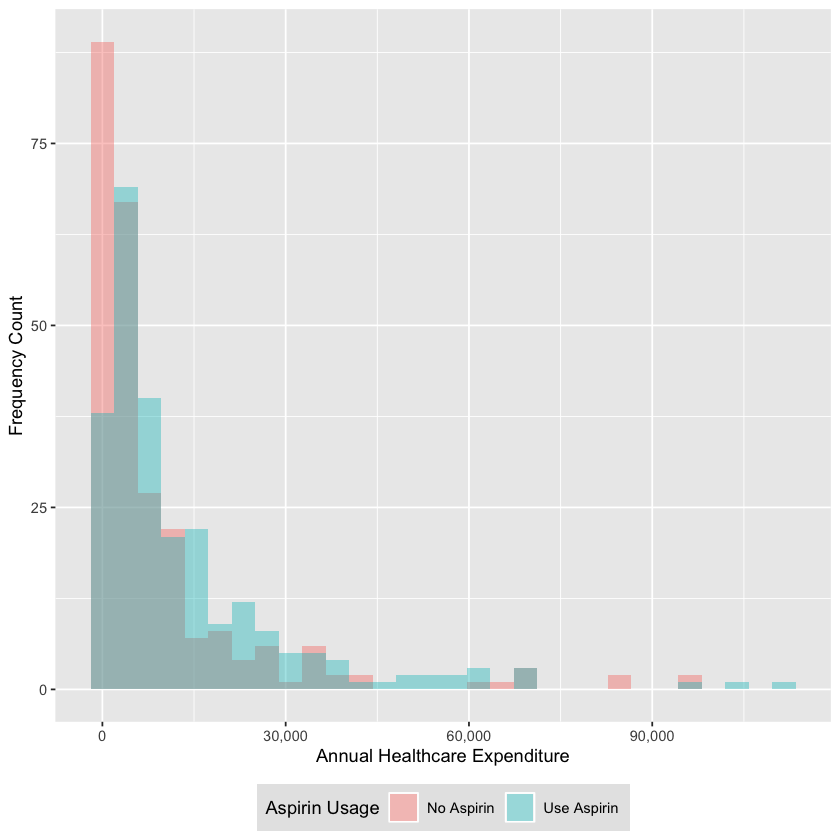

In [22]:
# Create Histogram of Annual Expenditure Among Aspirin Group
aspirin_plot <- ggplot(aspirin_sample, aes(x=TOTEXP09, fill=factor(aspirin_use))) + 
geom_histogram(alpha = 0.4, position='identity', bins = 30) +
theme(legend.background = element_rect(fill='gray90'),legend.position='bottom') +
labs(fill='Aspirin Usage', x='Annual Healthcare Expenditure', y='Frequency Count') +
scale_x_continuous(labels = scales::comma)

# Display Histogram
aspirin_plot

We can see a difference between the groups. However, it's hard to tell the differences between the two groups due to the x-axis scale. Lets zoom into the first portion of the chart (0 - 40,000) and add references line (representing mean or median). 

Is the plot for the two histograms normal or skewed? Should we use median or mean then?

The two plots are positively skewed. This indicates that using median would be better compared to mean. If you're unsure why, please review section 4.3

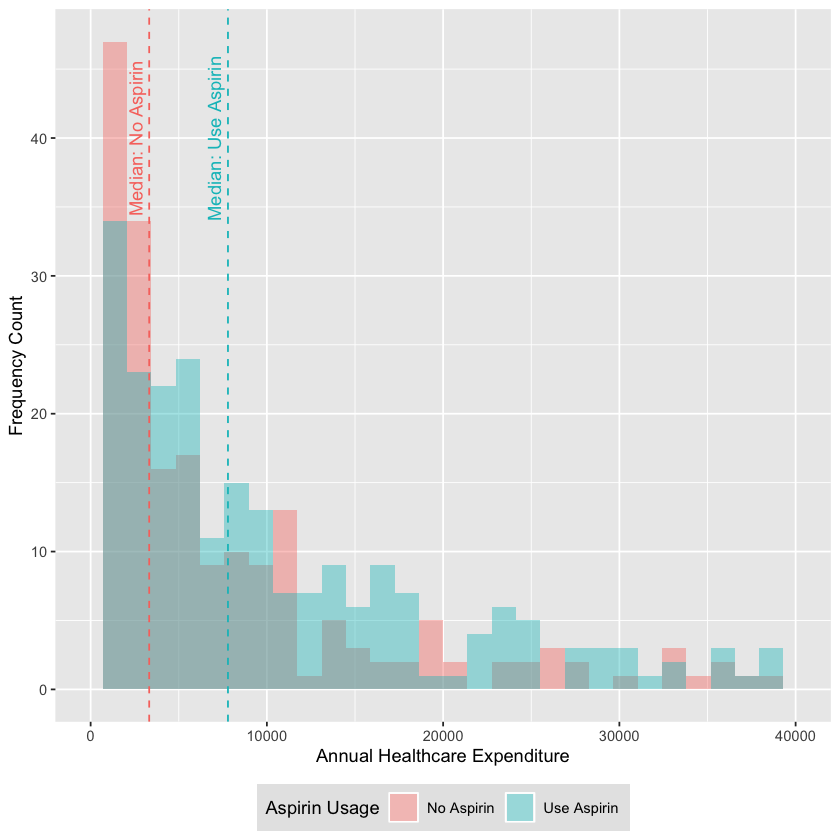

In [23]:
# Create Median Line
median_aspirin <- ddply(aspirin_sample, 'aspirin_use', summarize, grp.median=median(TOTEXP09))
median_use <- median(aspirin_sample$TOTEXP09[aspirin_sample$aspirin_use == 'Use Aspirin'])
median_no_use <- median(aspirin_sample$TOTEXP09[aspirin_sample$aspirin_use == 'No Aspirin'])

# Add Median Line to Histogram
suppressMessages(suppressWarnings(print(aspirin_plot + geom_vline(data=median_aspirin, aes(xintercept=grp.median, color=aspirin_use),
                          linetype='dashed', show.legend = FALSE) + xlim(0, 40000) + 
geom_text(aes(x=median_use, label="Median: Use Aspirin", y=40), 
          colour="#00BFC4", angle=90, vjust = -0.5, check_overlap = TRUE) +
geom_text(aes(x=median_no_use, label="Median: No Aspirin", y=40), 
          colour="#F8766D", angle=90, vjust = -0.5, check_overlap = TRUE))))


Much better! Our histogram now shows a clear difference in distribution between the two samples. We can see that the distribution of the group that takes aspirin skews right towards higher annual expenditures.

### Why are the frequency counts lower in the second histogram?

You may have noticed the frequency counts are lower in the 2nd histogram compared to the first. This is due to the fact that histogram are heavily influenced by the number of bins (bars) displayed. Did our data change? It actually did not. This surprisingly large effect was only from focusing on a smaller range of health care expenditures. Keep this in mind when interpreting and using histograms!

<img src="https://statistics.laerd.com/statistical-guides/img/histogram-4.png" style="width: 80%; margin-bottom: 0.5em;">


## Visualizing Aspirin Costs With A Boxplot

We can also visually compare the difference in the shapes of the distribution using a box plot. Additional information about interpreting a boxplot can be found in section 4.5.1.

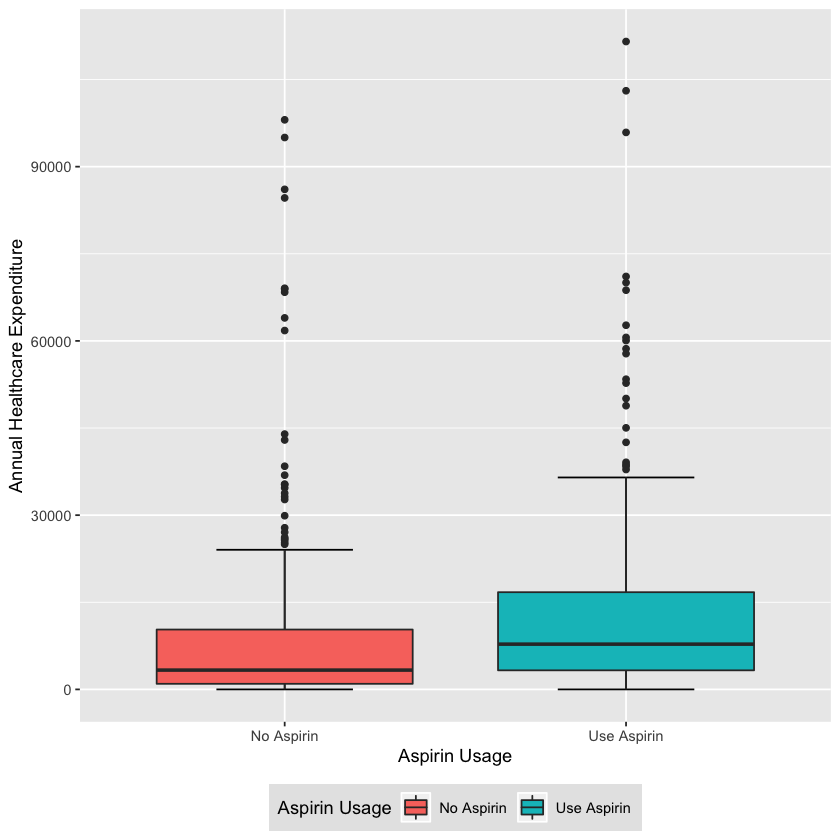

In [24]:
# Setting up the plot
aspirin_boxplot <- ggplot(aspirin_sample, aes(x=aspirin_use, y=TOTEXP09, fill=factor(aspirin_use))) + 
stat_boxplot(geom = "errorbar", width = 0.4) + geom_boxplot() +
theme(legend.background = element_rect(fill='gray90'),legend.position='bottom') +
labs(fill='Aspirin Usage', x='Aspirin Usage', y='Annual Healthcare Expenditure') 

# Display boxplot 
aspirin_boxplot

The main box is very difficult to see due to the large number of points along the tail of each plot. Lets visualize the graph without some of these tail points to better compare the two boxes. 

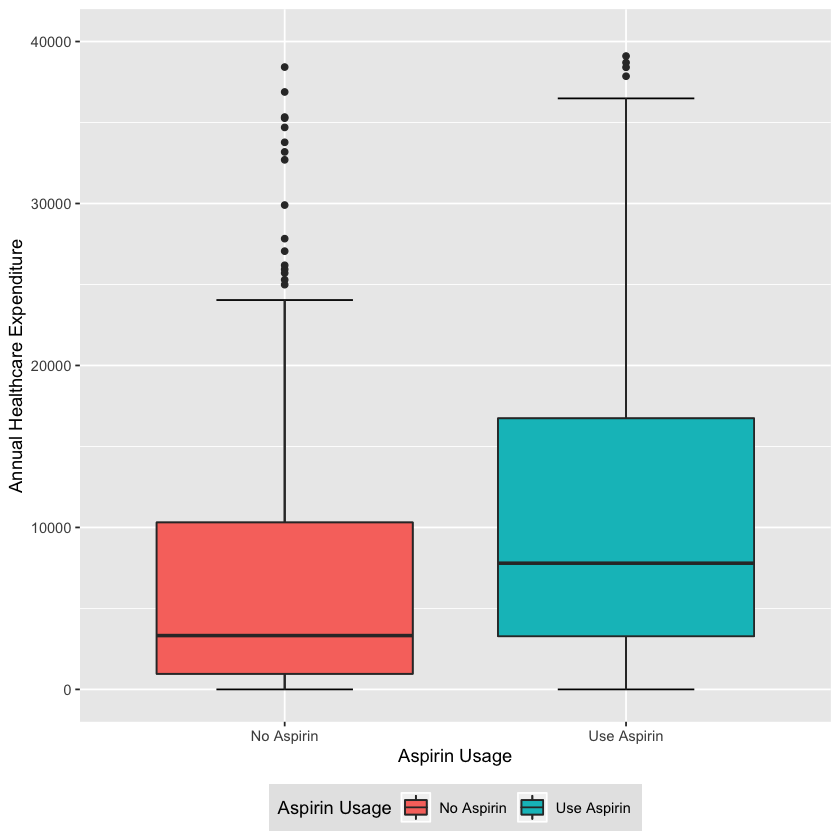

In [25]:
# New boxplot variable
aspirin_boxplot2 <- aspirin_boxplot + geom_boxplot(outlier.color = 'transparent') +
coord_cartesian(ylim = c(0, 40000))

# Display plot outliers
aspirin_boxplot2

There seems to be a clear difference in cost between the two group. This confirms our clinical suspicion that AERD would increased costs. This observed difference also makes this a good candidate feature (variable) for our prediction model. This is simply one demonstration of how to identify clinically relevant variables for a prediction model!

### How To Interpret A Boxplot

The boxplot divides data into division known as quartiles. The first quartile (Q1) corresponds to the 25th percentile of the data. The second quartile (Q2) corresponds to the 50th percentile of the data. This is also the median. The third quartile (Q3) corresponds to the 75 percentile of the data. The lines on the box represent Q1, the median, and Q3. The tails or 'whiskers' of the plots represent 1.5 * IQR below the Q1 and above the Q3. 

<img src="https://miro.medium.com/max/1200/1*2c21SkzJMf3frPXPAR_gZA.png" align="center" style="width: 70%; margin-bottom: 0.5em; margin-top: 0.5em;">

In this exercise, we've seen how descriptive analysis can aid us in identifying useful variables for building a prediction model. An important takeaway from this exercise is seeing how clinical knowledge can inform our data analysis. In our case, having an understanding of the pathophysiology of aspirin and asthma allows us to identify a variable that can lead to higher expenditure from more than 2000 variables. 

# Building A Predictive Model

We now arrive at building our prediction model. We will be employing logistic regression to conduct a statistical analysis followed by employing machine learning to construct a prediction model. At the end, our goal is to have a product that can identify high-risk/high-cost asthma patients!

## Reading In Our Data

Once again, we read in our data. We will be using our created file from Section 3: 'Cleaning our Data'

In [26]:
# Reading our data
cat('Data loading, please wait\n')
aggregation <- read.csv(file="data/aggregation.csv",  encoding="UTF-8", header=TRUE, sep=",")
cat('Data loaded!')

Data loading, please wait
Data loaded!

Now let's confirm our data has been loaded correctly

In [27]:
# Display the first few rows of the data
cat("Displaying the the first few rows of the data:\n")
head(aggregation)

Displaying the the first few rows of the data:


DUPERSID,REGION09,AGE09X,SEX,RACETHNX,SPOUIN09,RTHLTH53,EMPHDX,EMPHAGED,CHBRON53,ASTHDX,ASTHAGED,ASTHEP53,ASACUT53,ASMRCN53,ASPREV53,ASPKFL53,ASWNFL53,WLKLIM53,WLKDIF53,UNABLE53,BLIND42,CHAPPT42,CHBMIX42,PHYSCL42,CHECK53,EXRCIS53,ASPRIN53,BMINDX53,ADAPPT42,ADEGMC42,ADEXPL42,ADPRTM42,ADHECR42,ADSMOK42,ADNSMK42,DSFL0953,DSFL0853,DSFLNV53,WKINBD53,PMUNAB42,PMUNRS42,PMUNPR42,PMDLAY42,OCCCAT53,TTLP09X,FAMINC09,POVLEV09,UNINS09,INSCOV09,INS09X,TOTEXP09,PERWT09F,CONDIDX
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
40001101,2,28,1,4,1,2,2,-1,2,1,15,1,1,2,1,2,-1,2,-1,-1,-1,-1,-1,-1,6,2,2,26.6,3,4,4,4,10,2,-1,-1,-1,-1,-1,2,-1,-1,2,-2,48500,121000,700.72,2,1,1,1173,14251.11,4.00011e+11
40001103,2,2,1,4,3,2,-1,-1,-1,1,0,1,1,2,2,2,-1,2,-1,-1,-1,5,-1,-1,-1,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,-1,2,-1,0,121000,700.72,2,1,1,3215,14803.09,4.00011e+11
40044101,2,79,1,4,2,4,1,76,1,1,65,-1,2,-1,2,2,-1,1,3,1,-1,-1,-1,-1,1,2,1,34.3,6,4,4,4,10,2,-1,1,1,2,-1,2,-1,-1,2,-1,49570,49570,481.77,2,1,1,14951,17739.80,4.00441e+11
40050101,2,41,1,4,1,2,2,-1,2,1,8,-1,1,2,1,1,3,2,-1,-1,-1,-1,-1,-1,1,1,2,31.7,1,4,4,4,8,2,-1,-1,-1,-1,-1,2,-1,-1,2,-2,199424,248131,1140.52,2,1,1,3791,10588.75,4.00501e+11
40052101,3,69,2,4,2,5,1,68,2,2,-1,-1,-1,-1,-1,-1,-1,1,4,1,2,-1,-1,-1,1,2,2,25.3,5,4,4,4,10,2,-1,2,2,2,-1,2,-1,-1,2,-1,0,11000,65.55,2,2,1,58604,4936.99,4.00521e+11
40084101,2,62,2,4,2,5,2,-1,2,1,-9,-1,-9,-1,-9,-9,-1,1,4,2,-1,-1,-1,-1,1,1,2,45.9,0,-1,-1,-1,-1,2,-1,-9,-9,-9,-1,2,-1,-1,2,-1,7200,7200,48.69,2,2,1,3626,10424.43,4.00841e+11


## Converting Variables Into Categorical Variables

**Pre-Check:** What is the difference between a quantitative and categorical variable?

>- **Quantitative:** variables whose values are whole numbers (ie. numbers, percents)
>- **Categorical:** variables whose values are selected from a group (ie. dog breeds, male/female) 

Several of our variables are categorical variables but are mistakenly classified in R as quantitative. This is due to their data label being numbers (ie. for `ASPRIN53` 1 = taking aspirin & 2 = not taking aspirin). The code below will convert these variable to categorical variables. 

In [28]:
# Converting variables to categorical variable type
aggregation$REGION09 <- as.factor(aggregation$REGION09)
aggregation$SEX <- as.factor(aggregation$SEX)
aggregation$RACETHNX <- as.factor(aggregation$RACETHNX)
aggregation$SPOUIN09 <- as.factor(aggregation$SPOUIN09)
aggregation$RTHLTH53 <- as.factor(aggregation$RTHLTH53)
aggregation$EMPHDX <- as.factor(aggregation$EMPHDX)
aggregation$CHBRON53 <- as.factor(aggregation$CHBRON53)
aggregation$ASTHDX <- as.factor(aggregation$ASTHDX)
aggregation$ASACUT53 <- as.factor(aggregation$ASACUT53)
aggregation$ASMRCN53 <- as.factor(aggregation$ASMRCN53)
aggregation$ASPREV53 <- as.factor(aggregation$ASPREV53)
aggregation$ASPKFL53 <- as.factor(aggregation$ASPKFL53)
aggregation$ASWNFL53 <- as.factor(aggregation$ASWNFL53)
aggregation$WLKLIM53 <- as.factor(aggregation$WLKLIM53)
aggregation$WLKDIF53 <- as.factor(aggregation$WLKDIF53)
aggregation$UNABLE53 <- as.factor(aggregation$UNABLE53)
aggregation$BLIND42 <- as.factor(aggregation$BLIND42)
aggregation$PHYSCL42 <- as.factor(aggregation$PHYSCL42)
aggregation$EXRCIS53 <- as.factor(aggregation$EXRCIS53)
aggregation$ASPRIN53 <- as.factor(aggregation$ASPRIN53)
aggregation$ADEGMC42 <- as.factor(aggregation$ADEGMC42)
aggregation$ADEXPL42 <- as.factor(aggregation$ADEXPL42)
aggregation$ADPRTM42 <- as.factor(aggregation$ADPRTM42)
aggregation$ADSMOK42 <- as.factor(aggregation$ADSMOK42)
aggregation$ADNSMK42 <- as.factor(aggregation$ADNSMK42)
aggregation$DSFL0953 <- as.factor(aggregation$DSFL0953)
aggregation$DSFL0853 <- as.factor(aggregation$DSFL0853)
aggregation$DSFLNV53 <- as.factor(aggregation$DSFLNV53)
aggregation$PMUNAB42 <- as.factor(aggregation$PMUNAB42)
aggregation$PMUNRS42 <- as.factor(aggregation$PMUNRS42)
aggregation$PMUNPR42 <- as.factor(aggregation$PMUNPR42)
aggregation$PMDLAY42 <- as.factor(aggregation$PMDLAY42)
aggregation$OCCCAT53 <- as.factor(aggregation$OCCCAT53)
aggregation$UNINS09 <- as.factor(aggregation$UNINS09)
aggregation$INSCOV09 <- as.factor(aggregation$INSCOV09)
aggregation$INS09X <- as.factor(aggregation$INS09X)

### Why Is Classifying Variables Correctly Important?

Having a classifying variable as the correct data type is critical because certain statistical and analytical measurements can only be used for specific data types. For instance, we can graph quantitative data using a histogram but not categorical data. On the other hand, logistic regression can measure the outcome of a type of categorical variable known as a binary variable (ie. yes/no, high-risk/low-risk) but is unable to measure the outcome of quantitative variables. 

## Defining High- and Low- Risk Patients

Next, we need to define what a low-risk or high-risk patient is, so we can train our prediction model and evaluate its performance.

We will begin descriptively examining our data.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     601    2122    7318    6825  290987 

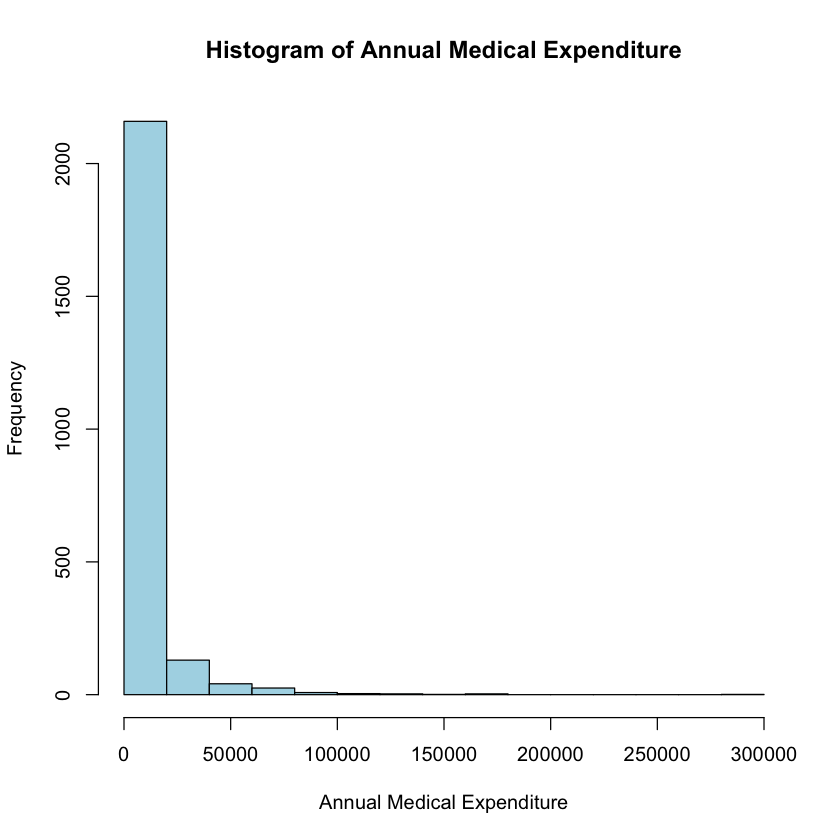

In [29]:
# Summary statistics for annual healthcare expenditure
summary (aggregation$TOTEXP09)

# Histogram of annual healthcare expenditure
hist(aggregation$TOTEXP09, col = 'lightblue', xlab = "Annual Medical Expenditure", 
     main = "Histogram of Annual Medical Expenditure", breaks = 20)

From our analysis, we can see that the distribution for annual medical expenditure is not a normal distribution. 

**Knowledge Check:** Based our distribution, should we use mean or median?

A non-normal distribution indicates that median would be a better measure of central tendency. 

The median provides us a useful measure for defining high- and low- risk. Since individuals above the median annual expenditure represent the larger 1/2 of expenditure values, we can classify these individuals as high-risk. Since individuals below the median annual expenditure represent the smaller 1/2 of expenditure values, we can classify these individuals as low-risk. In summary

**High-risk** patients are defined as those with annual medical expenditures **>= 2122**
<br>
**Low-risk** patients are defined as those with annual medical expenditures **<= 2122**

The below code will convert our expenditure into binary risk categories

<img align="left" width="100" height="100" src="https://cdn-01.media-brady.com/store/stus/media/catalog/product/cache/4/image/85e4522595efc69f496374d01ef2bf13/1544627174/r/e/reflective-warning-signs-caution-ac0563-lg.jpg" style="padding-right: 10px">If you run the below code more than once, please restart the exercise. Running it more than once will cause errors in our later prediction model. Do not run the code cell again after you see the 'Labeling complete' text!


In [30]:
# Labeling indviduals as high or low risk
aggregation$TOTEXP09 <- ifelse(aggregation$TOTEXP09 >= 2122, "high_risk", "low_risk")
cat('Labeling complete!')

Labeling complete!

## Analyzing Our Data: Logistic Regression 

Now that our variables have been successfully converted and our outcome has been defined, we can analyze our data. Logistic regression is a mathematical model that estimates the probability of a binary outcome (such as our risk label). It is named after the logistic curve which takes the S-shape depicted below.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png?1566122052688" alt="Logistic Curve" title="Logistic Curve" />

**Pre-Check:** What is our primary outcome? What information will a logistic regression model tell use about our outcome?

Our primary income is whether an individual is a high or low risk asthmatic individual. It will allow us to analyze which variables have a statistically significant effect on whether an asthmatic individual is high- or low-risk while controlling for other variables. Logistic regression is a commonly used technique in health analytics because it is easy to interpret and is thought to model the multi-factorial causes of disease well. 

**Follow-Up:** What is statistical significance? What is a generally accepted level of statistical significance in healthcare research?

Statistical Significance can be defined as the chance that the relationship you observed in your data occurred by chance. What does this mean? Let's say our logistic regression model finds that weight has a statistically significant effect on being high risk or low risk asthmatic patient. This means that it is more likely that there is indeed a relationship between weight and risk than chance would suggest. 

The conventional level of significance that is accepted is < 0.05 (this number is referred to as a p-value). This means that there is a less than 5% chance that the observed relationship in the data was due to chance alone. The image below displays a sample R output.

<img src="https://drchrispook.files.wordpress.com/2017/02/anova-output-from-r1.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

By converting expenditure into 'high-risk' or 'low-risk', we've converted expenditure from a quantitative variable into a categorical variable. We now need to change the data type in R to reflect this. 

In [31]:
# Expenditure is now a categorical variable. Below code is converting it to a categorical variable. 
aggregation$TOTEXP09 <- as.factor(aggregation$TOTEXP09)

We can now create our logistic model. 

In [32]:
# Creating a logistic regression model
# Note: DUPERSID is a personal ID and CONDIDX is an independent variable. For these reasons, these variables were not
# included in the model
mylogit <- glm(TOTEXP09 ~ ., data = aggregation[,c(2:53)], family = "binomial")
mylogit.sum <- summary(mylogit)
mylogit.sum

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = TOTEXP09 ~ ., family = "binomial", data = aggregation[, 
    c(2:53)])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.94439  -0.68070  -0.00012   0.72184   2.71133  

Coefficients: (23 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.749e+01  6.155e+03  -0.009 0.992547    
REGION091   -1.393e+01  8.146e+02  -0.017 0.986359    
REGION092   -1.397e+01  8.146e+02  -0.017 0.986316    
REGION093   -1.361e+01  8.146e+02  -0.017 0.986669    
REGION094   -1.349e+01  8.146e+02  -0.017 0.986789    
AGE09X      -2.472e-02  6.005e-03  -4.117 3.85e-05 ***
SEX2        -1.790e-01  1.190e-01  -1.503 0.132724    
RACETHNX2   -1.023e-01  1.678e-01  -0.610 0.542044    
RACETHNX3   -1.264e-01  2.960e-01  -0.427 0.669448    
RACETHNX4   -3.655e-01  1.673e-01  -2.185 0.028893 *  
SPOUIN092    3.930e-01  1.622e-01   2.423 0.015406 *  
SPOUIN093   -5.550e-03  3.625e-01  -0.015 0.987783    
RTHLTH53-1  

The above model allows us to see what variables are considred to have a statically significant effect on risk for high healthcare expenditure. For instance, `AGE09X`(age) has a statistically significant effect with a p-value of 0.0000385. Interestingly, `ASPRIN53`(aspirin) was not considered a statistically significant variable (although the p-value is close to 0.05, it is still greater than 0.05).

## Building a Prediction Model

**Pre-Check:** So far we haven't done any machine learning yet. What we've done can be considered traditional statistical analysis. What is Machine Learning?

In machine learning, data is split into a training set and a test set. A machine learning model is then trainined on the training set to predict whatever outcome of interest it was designed to predict (in our case we're predicting whether the asthmatic patient is high- or low- risk). The model's predictive performance is then evaluated using the test set. 

<img src="https://www.sqlservercentral.com/wp-content/uploads/2019/05/Image-2.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

We now need to split our data into training and test data. We will be splitting our data into 80% training data and 20% test data. 

In [33]:
# Setting seed value to reproduce results of random sampling
set.seed(123)

# row positions for training data
trainingRowIndex <- sample(1:nrow(aggregation), 0.8*nrow(aggregation))  

# Creating training data
trainingData <- aggregation[trainingRowIndex, ]  
cat('The number of traning data observations:', length(trainingData$TOTEXP09), '\n') # Checking the amount of training data

# Creating test data
testData  <- aggregation[-trainingRowIndex, ]  
cat('The number of test data observations:', length(testData$TOTEXP09)) # Checking the amount of test data

The number of traning data observations: 1900 
The number of test data observations: 475

Now that we've created our training and test data, we need to build our machine learning model. 

In [34]:
# Build the model on training data
cat('Training model, please be patient...')
suppressMessages(attach(trainingData))
mylogit <- suppressWarnings(train(TOTEXP09 ~ ., data = trainingData[,c(2:53)], method = 'glm', family = 'binomial',na.action=na.omit))
detach(trainingData)

cat('Model trained!')

Training model, please be patient...Model trained!

Now our model is trained and we need to apply it to the test data

In [35]:
# Apply the model to test data
modelPred.na <- predict(mylogit, newdata = testData[,c(2:53)], method = "glm", na.action = na.pass)

cat('Model successfully applied to test data!')

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”

Model successfully applied to test data!

Finally we will generate what's called a confusion matrix. 

In [36]:
# Create Confusion matrix
cm <- confusionMatrix(modelPred.na, testData$TOTEXP09)
## Show confusion matrix
cm

Confusion Matrix and Statistics

           Reference
Prediction  high_risk low_risk
  high_risk       169       58
  low_risk         63      185
                                          
               Accuracy : 0.7453          
                 95% CI : (0.7036, 0.7839)
    No Information Rate : 0.5116          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.49            
                                          
 Mcnemar's Test P-Value : 0.7161          
                                          
            Sensitivity : 0.7284          
            Specificity : 0.7613          
         Pos Pred Value : 0.7445          
         Neg Pred Value : 0.7460          
             Prevalence : 0.4884          
         Detection Rate : 0.3558          
   Detection Prevalence : 0.4779          
      Balanced Accuracy : 0.7449          
                                          
       'Positive' Class : high_risk 

Our model was able to correctly predict 75% of the time with a sensitivity of 73% and a specificity of 76%. The similar sensitivity and specificity indicate this model approximately equal in ruling out and ruling in whether a patient is at high risk. 

One question you may be wondering is does our model perform well enough? That depends. That depends on the type of conditions or predictions we're making. That depends on whether alternative predictive models or tools exist and how our new model compares. Additional research or consideration should always be done to consider whether a model's result is not only statistically significant, but **clinically significant**. 

### What Is A Confusion Matrix

A confusion matrix is a 2x2 table which computes 4 different combinations of predicted vs. actual values. The combinations are True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)

<img src="https://miro.medium.com/max/320/1*Z54JgbS4DUwWSknhDCvNTQ.png" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

These 4 interpretations can be combined to generate many useful metrics. For our purpose there are three we will focus on. The first is accuracy:

\[\large (TP + TN)/Total\]

Accuracy allows us to measure how often our model predicted correctly. The second metric is sensitivity:

\[\large TP / (TP + FN)\]

Sensitivity asks the question, that when our outcome is actually positive (ie. in our case when our patient is actually at high risk) how often will the model predict positively (ie. how often will the model then predict the patient to be at high risk). The final metric is specificity:

\[\large TN / (FP + TN)\]

Specificity asks the question, that when the outcome is actually negative (ie. in our case when our patient is actually at low risk) how often will the model predict negatively (ie. how often will the model then predict the patient to be at low risk). 

## Evaluating our Model

We will be evaluating our model using a receiver operating curve (ROC) and the area under the curve (AUC) value. 

> If you're unsure what a ROC or AUC value is, please consult section 5.1.1 ('Understanding ROC Curves and AUC Values')

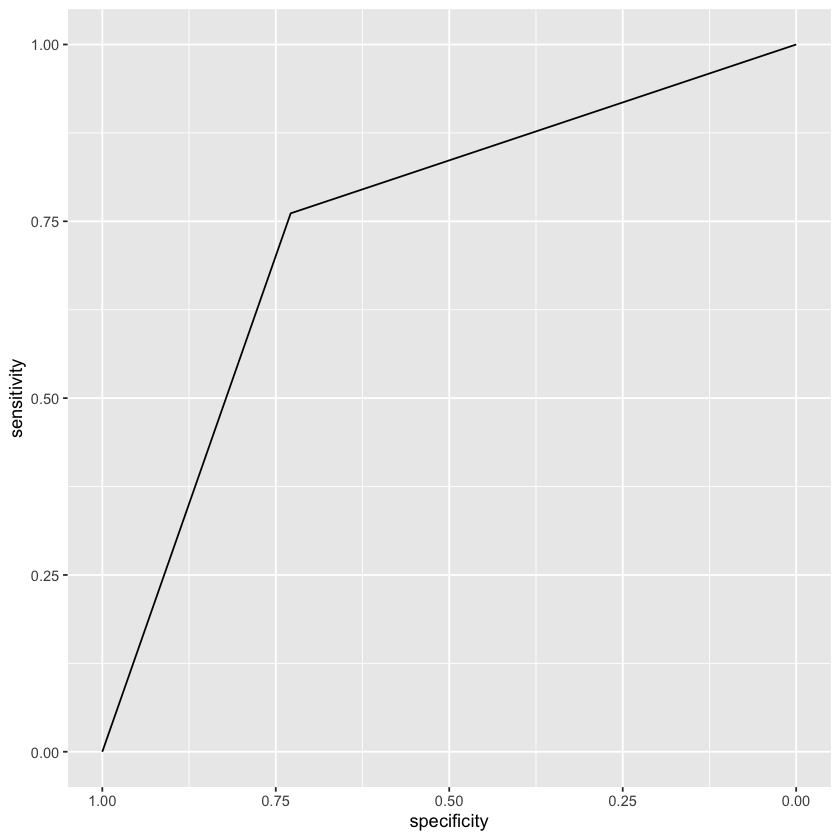

In [37]:
# Create a ROC curve
ROC <- roc(response = testData$TOTEXP09, predictor = factor(modelPred.na, 
                                                           ordered = TRUE, 
                                                           levels = c('low_risk', 'high_risk')))

# Plot ROC with ggplot2
plot_ROC <- ggroc(ROC)
plot_ROC

In [38]:
# Calculate the area under the curve (AUC)
cat('AUC:', round(auc(ROC), 2))

AUC: 0.74

The closer to the top left corner our ROC curve, the better. The higher our AUC value, the better. These metrics provide useful measures when tuning our model. They are also better overall measures than accuracy alone. We can compare different models using these two metrics. 

### Understanding ROC Curves and AUC Values

A ROC plots sensitivity (probability of predicting a real positive will be positive) against 1-specificity (the probability of predicting a real negative will be a positive). A model with a 50-50 chance of making a correct decision will have a ROC curve which is just a diagonal line. A model with a curve that hugs the top left corner is a perfect model. The area under a curve is a measure of the magnitude of the ROC curve. The closer the ROC curve is to the top left corner, the higher the AUC value. The higher the AUC value, the better. 

<img src="https://miro.medium.com/max/406/1*pk05QGzoWhCgRiiFbz-oKQ.png" style="float: center; width: 34%; margin-bottom: 0.5em;">

## Explaining the Model

An important part of any model is to explain it. We will be measuring the variable importance for our model. The higher the variable importance, the more important that variable is for our model for predicting no shows.

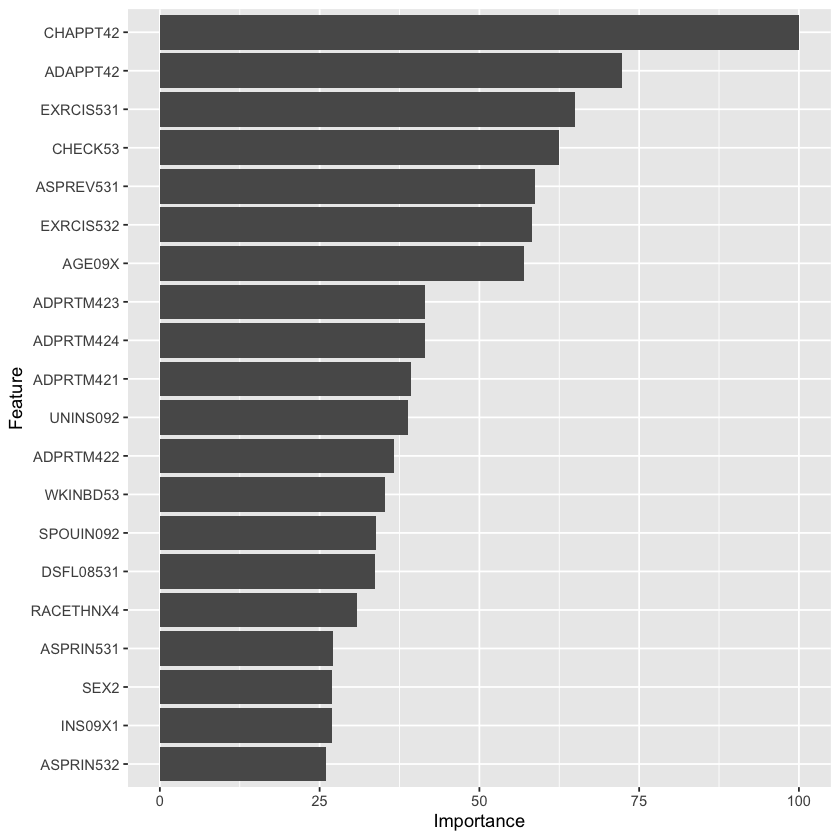

In [46]:
test <- varImp(mylogit)
ggplot(test,top=20)

Congratulations! You've reached the end of the case! This case provided just one example of how analytics and healthcare can be combined to solve clinical problems. I hope your curiosity has been piqued. There will be much more to learn and much more you can explore in this field!

# Function

In [ ]:
colnames(trainingData)

In [49]:
play <- function(features){
    # Build the model on training data
    cat('Training model, please be patient...\n')
    total_variables <- append(features, 'TOTEXP09')
    play_trainingData <- subset(trainingData,select = total_variables)
    play_testData <- subset(testData,select = total_variables)
    suppressMessages(attach(trainingData))
    mylogit <- suppressWarnings(train(TOTEXP09~., data = play_trainingData, method = 'glm', family = 'binomial',na.action=na.omit))
    detach(trainingData)

    cat('Model trained!\n')
    # Apply the model to test data
    modelPred.na <- predict(mylogit, newdata = play_testData, method = "glm", na.action = na.pass)

    cat('Model successfully applied to test data!\n')

    # Create Confusion matrix
    cm <- confusionMatrix(modelPred.na, play_testData$TOTEXP09)
    ## Show confusion matrix
    print(cm)

    # Create a ROC curve
    ROC <- roc(response =play_testData$TOTEXP09, predictor = factor(modelPred.na, 
                                                               ordered = TRUE, 
                                                               levels = c('low_risk', 'high_risk')))
    # Plot ROC with ggplot2
    plot_ROC <- ggroc(ROC)
    print(plot_ROC)
    
    # Calculate the area under the curve (AUC)
    cat('AUC:', round(auc(ROC), 2),'\n')
    test <- varImp(mylogit)
    ggplot(test)
}



Training model, please be patient...
Model trained!
Model successfully applied to test data!
Confusion Matrix and Statistics

           Reference
Prediction  high_risk low_risk
  high_risk       145       63
  low_risk         87      180
                                          
               Accuracy : 0.6842          
                 95% CI : (0.6403, 0.7258)
    No Information Rate : 0.5116          
    P-Value [Acc > NIR] : 1.764e-14       
                                          
                  Kappa : 0.3666          
                                          
 Mcnemar's Test P-Value : 0.06039         
                                          
            Sensitivity : 0.6250          
            Specificity : 0.7407          
         Pos Pred Value : 0.6971          
         Neg Pred Value : 0.6742          
             Prevalence : 0.4884          
         Detection Rate : 0.3053          
   Detection Prevalence : 0.4379          
      Balanced Accuracy : 0.6

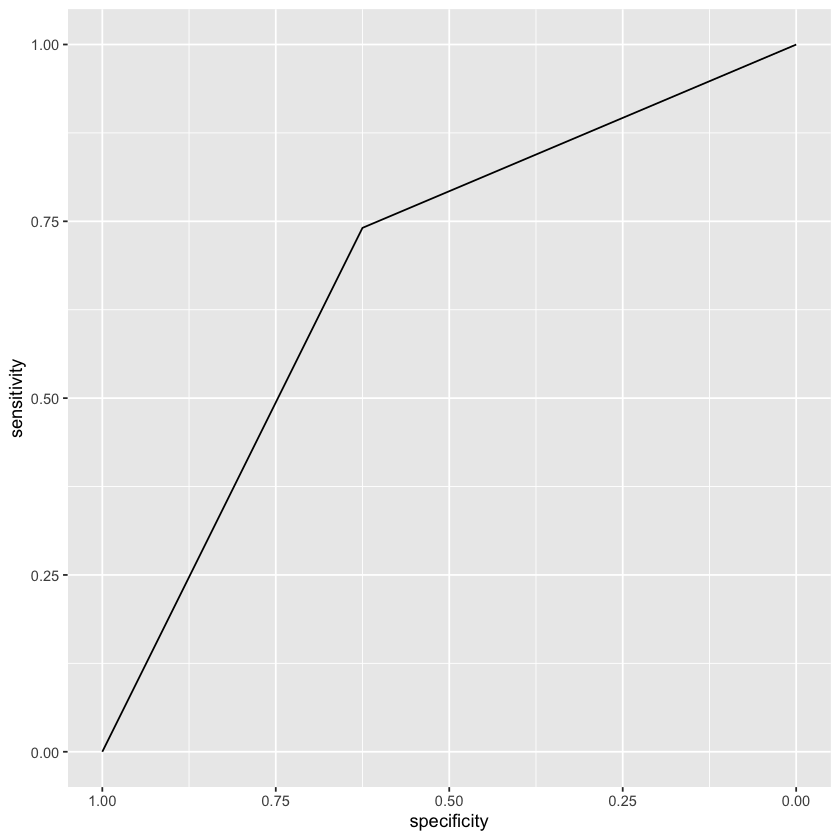

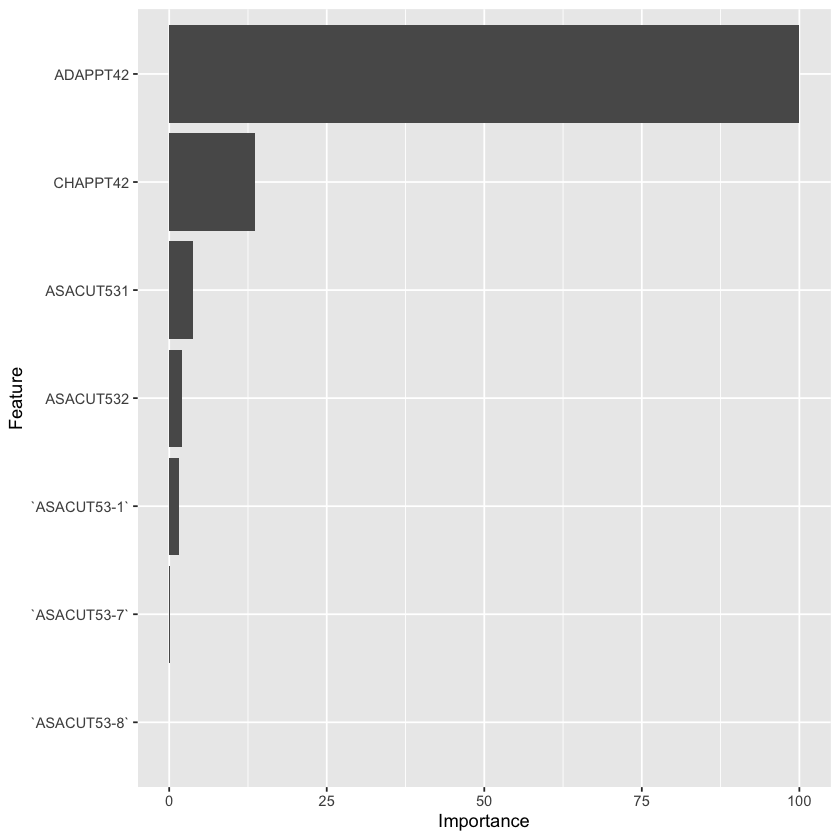

In [50]:
features = c("ASACUT53","ADAPPT42","CHAPPT42")

play(features)